In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import umap
from sklearn.impute import KNNImputer
from sklearn.linear_model import LassoCV
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.utils import shuffle

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

In [5]:
df0 = pd.read_csv('E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/aim1_2_merged1_baidu.csv')
df0

,subject_id,hadm_id,chartdate,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Glucose~50809~mg/dL,"Blood Gas~Blood~Hematocrit, Calculated~50810~%",Blood Gas~Blood~Hemoglobin~50811~g/dL,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~Methemoglobin~50814~%,Blood Gas~Blood~O2 Flow~50815~L/min,Blood Gas~Blood~Oxygen~50816~%,Blood Gas~Blood~Oxygen Saturation~50817~%,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~PEEP~50819~,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,"Blood Gas~Blood~Potassium, Whole Blood~50822~mEq/L",Blood Gas~Blood~Required O2~50823~,"Blood Gas~Blood~Sodium, Whole Blood~50824~mEq/L",Blood Gas~Blood~Temperature~50825~,Blood Gas~Blood~Tidal Volume~50826~,Chemistry~Blood~% Hemoglobin A1c~50852~%,Chemistry~Blood~25-OH Vitamin D~50853~ng/mL,Chemistry~Blood~Acetaminophen~50856~ug/mL,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Alpha-Fetoprotein~50864~ng/mL,Chemistry~Blood~Amikacin~50865~ug/mL,Chemistry~Blood~Ammonia~50866~umol/L,Chemistry~Blood~Amylase~50867~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Anti-DGP (IgA/IgG)~50869~units,"Chemistry~Blood~Anti-Gliadin Antibody, IgA~50870~units",Chemistry~Blood~Anti-Thyroglobulin Antibodies~50877~IU/mL,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Beta-2 Microglobulin~50881~mg/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Direct~50883~mg/dL","Chemistry~Blood~Bilirubin, Indirect~50884~mg/dL","Chemistry~Blood~Bilirubin, Total~50885~mg/dL",Chemistry~Blood~C-Reactive Protein~50889~mg/L_,Chemistry~Blood~C3~50890~mg/dL,Chemistry~Blood~C4~50891~mg/dL,...,Hematology~Blood~dRVVT - Confirmation~52107~,Hematology~Blood~dRVVT - Normalized Ratio~52108~,Hematology~Blood~dRVVT - Screen~52109~,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Blood~SCT - Confirmation~52177~,Hematology~Blood~SCT - Normalized Ratio~52178~,Hematology~Blood~SCT - Screen~52179~,Hematology~Cerebrospinal Fluid~Atypical Lymphocytes~52221~%,Hematology~Cerebrospinal Fluid~Bands~52223~%,Hematology~Cerebrospinal Fluid~Basophils~52225~%,Hematology~Cerebrospinal Fluid~Blasts~52227~%,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,"Hematology~Cerebrospinal Fluid~Hematocrit, CSF~52257~%",Hematology~Cerebrospinal Fluid~Lining Cell~52263~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Mesothelial cells~52268~%,Hematology~Cerebrospinal Fluid~Metamyelocytes~52270~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Myelocytes~52274~%,Hematology~Cerebrospinal Fluid~NRBC~52276~%,Hematology~Cerebrospinal Fluid~Other~52278~%,Hematology~Cerebrospinal Fluid~Plasma~52279~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,Hematology~Cerebrospinal Fluid~Promyelocytes~52283~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",Hematology~Cerebrospinal Fluid~Young~52288~%,Hematology~Blood~Absolute Lymphocyte Count~52769~#/uL,gender,age,culture,long_title,icd_title,chiefcomplaint,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,Allergies,Chief Complaint,History of Present Illness,Past Medical History,Family History,hospital_expire_flag
0,10001217,24597018.0,2157-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
pd.set_option('display.max_columns',100)

In [6]:
df0.culture.value_counts()

0    11582
1      277
Name: culture, dtype: int64

In [7]:
df0.hospital_expire_flag.value_counts()

0.0    6679
1.0     414
Name: hospital_expire_flag, dtype: int64

In [8]:
df1 = pd.concat([df0.iloc[:,:-18],df0.iloc[:,-14:-6],df0.iloc[:,-1:]],axis=1)
df1 = df1.iloc[:,3:]
df1['hospital_expire_flag'] = df1['hospital_expire_flag'].astype('Int64')
df1

,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Glucose~50809~mg/dL,"Blood Gas~Blood~Hematocrit, Calculated~50810~%",Blood Gas~Blood~Hemoglobin~50811~g/dL,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~Methemoglobin~50814~%,Blood Gas~Blood~O2 Flow~50815~L/min,Blood Gas~Blood~Oxygen~50816~%,Blood Gas~Blood~Oxygen Saturation~50817~%,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~PEEP~50819~,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,"Blood Gas~Blood~Potassium, Whole Blood~50822~mEq/L",Blood Gas~Blood~Required O2~50823~,"Blood Gas~Blood~Sodium, Whole Blood~50824~mEq/L",Blood Gas~Blood~Temperature~50825~,Blood Gas~Blood~Tidal Volume~50826~,Chemistry~Blood~% Hemoglobin A1c~50852~%,Chemistry~Blood~25-OH Vitamin D~50853~ng/mL,Chemistry~Blood~Acetaminophen~50856~ug/mL,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Alpha-Fetoprotein~50864~ng/mL,Chemistry~Blood~Amikacin~50865~ug/mL,Chemistry~Blood~Ammonia~50866~umol/L,Chemistry~Blood~Amylase~50867~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Anti-DGP (IgA/IgG)~50869~units,"Chemistry~Blood~Anti-Gliadin Antibody, IgA~50870~units",Chemistry~Blood~Anti-Thyroglobulin Antibodies~50877~IU/mL,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Beta-2 Microglobulin~50881~mg/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Direct~50883~mg/dL","Chemistry~Blood~Bilirubin, Indirect~50884~mg/dL","Chemistry~Blood~Bilirubin, Total~50885~mg/dL",Chemistry~Blood~C-Reactive Protein~50889~mg/L_,Chemistry~Blood~C3~50890~mg/dL,Chemistry~Blood~C4~50891~mg/dL,Chemistry~Blood~CA-125~50892~U/mL,"Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Calculated Free Testosterone~50894~pg/mL,...,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL",Chemistry~Cerebrospinal Fluid~HIV 1 Viral Load~51791~log10 copies/mL,"Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL","Blood Gas~Blood~Creatinine, Whole Blood~52024~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~dRVVT - Confirmation~52107~,Hematology~Blood~dRVVT - Normalized Ratio~52108~,Hematology~Blood~dRVVT - Screen~52109~,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Blood~SCT - Confirmation~52177~,Hematology~Blood~SCT - Normalized Ratio~52178~,Hematology~Blood~SCT - Screen~52179~,Hematology~Cerebrospinal Fluid~Atypical Lymphocytes~52221~%,Hematology~Cerebrospinal Fluid~Bands~52223~%,Hematology~Cerebrospinal Fluid~Basophils~52225~%,Hematology~Cerebrospinal Fluid~Blasts~52227~%,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,"Hematology~Cerebrospinal Fluid~Hematocrit, CSF~52257~%",Hematology~Cerebrospinal Fluid~Lining Cell~52263~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Mesothelial cells~52268~%,Hematology~Cerebrospinal Fluid~Metamyelocytes~52270~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Myelocytes~52274~%,Hematology~Cerebrospinal Fluid~NRBC~52276~%,Hematology~Cerebrospinal Fluid~Other~52278~%,Hematology~Cerebrospinal Fluid~Plasma~52279~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,Hematology~Cerebrospinal Fluid~Promyelocytes~52283~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fl

In [9]:
df1 = df1.dropna(subset=['hospital_expire_flag'], axis=0)
df1

,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Glucose~50809~mg/dL,"Blood Gas~Blood~Hematocrit, Calculated~50810~%",Blood Gas~Blood~Hemoglobin~50811~g/dL,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~Methemoglobin~50814~%,Blood Gas~Blood~O2 Flow~50815~L/min,Blood Gas~Blood~Oxygen~50816~%,Blood Gas~Blood~Oxygen Saturation~50817~%,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~PEEP~50819~,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,"Blood Gas~Blood~Potassium, Whole Blood~50822~mEq/L",Blood Gas~Blood~Required O2~50823~,"Blood Gas~Blood~Sodium, Whole Blood~50824~mEq/L",Blood Gas~Blood~Temperature~50825~,Blood Gas~Blood~Tidal Volume~50826~,Chemistry~Blood~% Hemoglobin A1c~50852~%,Chemistry~Blood~25-OH Vitamin D~50853~ng/mL,Chemistry~Blood~Acetaminophen~50856~ug/mL,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Alpha-Fetoprotein~50864~ng/mL,Chemistry~Blood~Amikacin~50865~ug/mL,Chemistry~Blood~Ammonia~50866~umol/L,Chemistry~Blood~Amylase~50867~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Anti-DGP (IgA/IgG)~50869~units,"Chemistry~Blood~Anti-Gliadin Antibody, IgA~50870~units",Chemistry~Blood~Anti-Thyroglobulin Antibodies~50877~IU/mL,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Beta-2 Microglobulin~50881~mg/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Direct~50883~mg/dL","Chemistry~Blood~Bilirubin, Indirect~50884~mg/dL","Chemistry~Blood~Bilirubin, Total~50885~mg/dL",Chemistry~Blood~C-Reactive Protein~50889~mg/L_,Chemistry~Blood~C3~50890~mg/dL,Chemistry~Blood~C4~50891~mg/dL,Chemistry~Blood~CA-125~50892~U/mL,"Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Calculated Free Testosterone~50894~pg/mL,...,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL",Chemistry~Cerebrospinal Fluid~HIV 1 Viral Load~51791~log10 copies/mL,"Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL","Blood Gas~Blood~Creatinine, Whole Blood~52024~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~dRVVT - Confirmation~52107~,Hematology~Blood~dRVVT - Normalized Ratio~52108~,Hematology~Blood~dRVVT - Screen~52109~,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Blood~SCT - Confirmation~52177~,Hematology~Blood~SCT - Normalized Ratio~52178~,Hematology~Blood~SCT - Screen~52179~,Hematology~Cerebrospinal Fluid~Atypical Lymphocytes~52221~%,Hematology~Cerebrospinal Fluid~Bands~52223~%,Hematology~Cerebrospinal Fluid~Basophils~52225~%,Hematology~Cerebrospinal Fluid~Blasts~52227~%,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,"Hematology~Cerebrospinal Fluid~Hematocrit, CSF~52257~%",Hematology~Cerebrospinal Fluid~Lining Cell~52263~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Mesothelial cells~52268~%,Hematology~Cerebrospinal Fluid~Metamyelocytes~52270~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Myelocytes~52274~%,Hematology~Cerebrospinal Fluid~NRBC~52276~%,Hematology~Cerebrospinal Fluid~Other~52278~%,Hematology~Cerebrospinal Fluid~Plasma~52279~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,Hematology~Cerebrospinal Fluid~Promyelocytes~52283~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fl

In [10]:
df1_0 = df1[df1['hospital_expire_flag']==0]
df1_0 = df1_0.dropna(thresh=len(df1_0)*0.1, axis=1)
df1_0

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~Immature Granulocytes~52135~%,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,hospital_expire_flag
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,5.0,0.0,F,55,99.0,81.0,16.0,97.0,160.0,102.0,0.0,3.0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,14.0,NaN,26.0,NaN,10.4,102.0,1.2,76.0,NaN,NaN,NaN,1.9,2.8,4.9,137.0,32.0,NaN,NaN,NaN,31.4,9.7,NaN,NaN,23.9,30.8,78.0,NaN,NaN,557.0,NaN,NaN,18.3,4.04,16.6,NaN,61.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,49.0,0.0,10.0,430.0,10.0,M,72,101.9,110.0,16.0,97.0,124.0,58.0,13.0,2.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,48.0,17.0,21.0,24.0,0.4,9.3,105.0,0.8,105.0,NaN,NaN,NaN,1.9,2.5,3.9,142.0,18.0,NaN,0.7,3.2,43.7,15.3,NaN,26.1,30.3,34.9,87.0,4.0,66.1,256.0,NaN,NaN,13.9,5.03,9.8,NaN,60.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,38.0,0.0,510.0,1.0,M,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,NaN,1.2,NaN,NaN,NaN,13.0,4.9,80.0,15.0,20.0,18.0,1.0,NaN,95.0,1.0,111.0,12.0,2.0,NaN,NaN,NaN,4.6,128.0,15.0,0.66,0.2,0.0,30.9,8.4,NaN,6.6,18.0,27.2,66.0,7.7,85.1,225.0,NaN,NaN,20.1,4.66,10.0,15.0,57.0,NaN,100.0,0.02,0.00,0.77,8.47,0.4,45.3,NaN,96.0,NaN,3.0,1.0,2.0,141.0,M,51,99.4,76.0,19.0,100.0,118.0,67.0,9.0,3.0,0
9,-3.0,21.0,0.8,35.0,7.37,144.0,NaN,NaN,NaN,10.0,NaN,21.0,NaN,8.1,117.0,0.6,189.0,NaN,NaN,NaN,1.6,2.8,3.5,144.0,7.0,NaN,NaN

In [11]:
df1_1 = df1[df1['hospital_expire_flag']==1]
df1_1 = df1_1.dropna(thresh=len(df1_1)*0.1, axis=1)
df1_1

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~Oxygen~50816~%,Blood Gas~Blood~Oxygen Saturation~50817~%,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~PEEP~50819~,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Blood Gas~Blood~Temperature~50825~,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatine Kinase (CK)~50910~IU/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,"Chemistry~Blood~Osmolality, Measured~50964~mOsm/kg",Chemistry~Blood~Phenytoin~50967~ug/mL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Chemistry~Blood~Vancomycin~51009~ug/mL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Atypical Lymphocytes~51143~%,Hematology~Blood~Bands~51144~%,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,"Hematology~Blood~Fibrinogen, Functional~51214~mg/dL",Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Metamyelocytes~51251~%,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Myelocytes~51255~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Other~52278~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,hospital_expire_flag
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,43.0,11.0,24.0,25.0,0.3,7.4,107.0,NaN,1.0,164.0,NaN,NaN,NaN,1.8,NaN,NaN,2.7,3.6,139.0,25.0,NaN,NaN,0.0,1.0,0.0,0.0,167.0,28.3,9.3,1.2,7.0,34.0,32.7,104.0,1.0,7.0,0.0,84.0,46.0,12.8,31.1,21.5,2.73,3.2,NaN,81.0,24.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,35.0,NaN,3.0,1.0,1.0,M,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,18.0,NaN,7.5,110.0,NaN,1.9,183.0,NaN,NaN,NaN,2.1,NaN,NaN,3.1,3.5,138.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.9,11.6,NaN,NaN,31.8,32.3,99.0,NaN,NaN,NaN,NaN,401.0,NaN,NaN,13.9,3.65,14.0,NaN,77.0,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,39.0,0.0,NaN,2.0,6.0,1.0,M,50,99.0,89.0,16.0,99.0,150.0,105.0,0.0,3.0,1
105,-8.0,11.0,1.12,1.0,30.0,99.0,14.0,5.0,7.50,182.0,NaN,40.0,3.9,1

In [12]:
# The intersection of two categories
col0 = set(df1_0)
col1 = set(df1_1)
cols_intersection = list(col0 & col1)

# After intersection, the order of columns is changed and corrected to the original order
cols_intersection_order = []
for each in df1_1.columns:
    if each in cols_intersection:
        cols_intersection_order.append(each)
    else:
        continue

print(len(cols_intersection_order))
df1 = df1[cols_intersection_order]
df1

70


,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,hospital_expire_flag
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,5.0,0.0,F,55,99.0,81.0,16.0,97.0,160.0,102.0,0.0,3.0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,14.0,NaN,26.0,NaN,10.4,102.0,1.2,76.0,NaN,NaN,NaN,1.9,2.8,4.9,137.0,32.0,NaN,NaN,NaN,31.4,9.7,NaN,NaN,23.9,30.8,78.0,NaN,NaN,557.0,NaN,NaN,18.3,4.04,16.6,NaN,61.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,49.0,0.0,10.0,430.0,10.0,M,72,101.9,110.0,16.0,97.0,124.0,58.0,13.0,2.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,48.0,17.0,21.0,24.0,0.4,9.3,105.0,0.8,105.0,NaN,NaN,NaN,1.9,2.5,3.9,142.0,18.0,NaN,0.7,3.2,43.7,15.3,NaN,26.1,30.3,34.9,87.0,4.0,66.1,256.0,NaN,NaN,13.9,5.03,9.8,NaN,60.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,38.0,0.0,510.0,1.0,M,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,NaN,1.2,NaN,NaN,NaN,13.0,4.9,80.0,15.0,20.0,18.0,1.0,NaN,95.0,1.0,111.0,12.0,2.0,NaN,NaN,NaN,4.6,128.0,15.0,0.66,0.2,0.0,30.9,8.4,NaN,6.6,18.0,27.2,66.0,7.7,85.1,225.0,NaN,NaN,20.1,4.66,10.0,15.0,57.0,NaN,100.0,0.02,0.00,0.77,8.47,45.3,NaN,96.0,NaN,3.0,1.0,2.0,141.0,M,51,99.4,76.0,19.0,100.0,118.0,67.0,9.0,3.0,0
9,-3.0,21.0,0.8,35.0,7.37,144.0,NaN,NaN,NaN,10.0,NaN,21.0,NaN,8.1,117.0,0.6,189.0,NaN,NaN,NaN,1.6,2.8,3.5,144.0,7.0,NaN,NaN,NaN,32.9,11.5,NaN,NaN,26.6,34.9,76.0,NaN,NaN,201.0,NaN,NaN,13.

In [13]:
df11 = df1.copy()
df11 = df11.dropna(thresh=int(df11.shape[0]*0.0),axis=1)
df11

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,hospital_expire_flag
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,0.0,0.0,5.0,0.0,F,55,99.0,81.0,16.0,97.0,160.0,102.0,0.0,3.0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,14.0,NaN,26.0,NaN,10.4,102.0,1.2,76.0,NaN,NaN,NaN,1.9,2.8,4.9,137.0,32.0,NaN,NaN,NaN,31.4,9.7,NaN,NaN,23.9,30.8,78.0,NaN,NaN,557.0,NaN,NaN,18.3,4.04,16.6,NaN,61.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,49.0,0.0,10.0,430.0,10.0,M,72,101.9,110.0,16.0,97.0,124.0,58.0,13.0,2.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,48.0,17.0,21.0,24.0,0.4,9.3,105.0,0.8,105.0,NaN,NaN,NaN,1.9,2.5,3.9,142.0,18.0,NaN,0.7,3.2,43.7,15.3,NaN,26.1,30.3,34.9,87.0,4.0,66.1,256.0,NaN,NaN,13.9,5.03,9.8,NaN,60.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,38.0,0.0,510.0,1.0,M,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,NaN,1.2,NaN,NaN,NaN,13.0,4.9,80.0,15.0,20.0,18.0,1.0,NaN,95.0,1.0,111.0,12.0,2.0,NaN,NaN,NaN,4.6,128.0,15.0,0.66,0.2,0.0,30.9,8.4,NaN,6.6,18.0,27.2,66.0,7.7,85.1,225.0,NaN,NaN,20.1,4.66,10.0,15.0,57.0,NaN,100.0,0.02,0.00,0.77,8.47,45.3,NaN,96.0,NaN,3.0,1.0,2.0,141.0,M,51,99.4,76.0,19.0,100.0,118.0,67.0,9.0,3.0,0
9,-3.0,21.0,0.8,35.0,7.37,144.0,NaN,NaN,NaN,10.0,NaN,21.0,NaN,8.1,117.0,0.6,189.0,NaN,NaN,NaN,1.6,2.8,3.5,144.0,7.0,NaN,NaN,NaN,32.9,11.5,NaN,NaN,26.6,34.9,76.0,NaN,NaN,201.0,NaN,NaN,13.

In [14]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7093 entries, 0 to 11858
Data columns (total 70 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Blood Gas~Blood~Base Excess~50802~mEq/L                               1116 non-null   float64
 1   Blood Gas~Blood~Calculated Total CO2~50804~mEq/L                      1116 non-null   float64
 2   Blood Gas~Blood~Lactate~50813~mmol/L                                  1609 non-null   float64
 3   Blood Gas~Blood~pCO2~50818~mm Hg                                      1116 non-null   float64
 4   Blood Gas~Blood~pH~50820~units                                        1165 non-null   float64
 5   Blood Gas~Blood~pO2~50821~mm Hg                                       1116 non-null   float64
 6   Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L             2688 non-null   float64
 

In [15]:
df12 = df11.copy()
df12 = df12.dropna(thresh=int(df12.shape[1]*0.40), axis=0)
df12

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,hospital_expire_flag
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,14.0,NaN,26.0,NaN,10.4,102.0,1.2,76.0,NaN,NaN,NaN,1.9,2.8,4.9,137.0,32.0,NaN,NaN,NaN,31.4,9.7,NaN,NaN,23.9,30.8,78.0,NaN,NaN,557.0,NaN,NaN,18.3,4.04,16.6,NaN,61.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,49.0,0.0,10.0,430.0,10.0,M,72,101.9,110.0,16.0,97.0,124.0,58.0,13.0,2.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,48.0,17.0,21.0,24.0,0.4,9.3,105.0,0.8,105.0,NaN,NaN,NaN,1.9,2.5,3.9,142.0,18.0,NaN,0.7,3.2,43.7,15.3,NaN,26.1,30.3,34.9,87.0,4.0,66.1,256.0,NaN,NaN,13.9,5.03,9.8,NaN,60.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,38.0,0.0,510.0,1.0,M,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,NaN,1.2,NaN,NaN,NaN,13.0,4.9,80.0,15.0,20.0,18.0,1.0,NaN,95.0,1.0,111.0,12.0,2.0,NaN,NaN,NaN,4.6,128.0,15.0,0.66,0.2,0.0,30.9,8.4,NaN,6.6,18.0,27.2,66.0,7.7,85.1,225.0,NaN,NaN,20.1,4.66,10.0,15.0,57.0,NaN,100.0,0.02,0.00,0.77,8.47,45.3,NaN,96.0,NaN,3.0,1.0,2.0,141.0,M,51,99.4,76.0,19.0,100.0,118.0,67.0,9.0,3.0,0
9,-3.0,21.0,0.8,35.0,7.37,144.0,NaN,NaN,NaN,10.0,NaN,21.0,NaN,8.1,117.0,0.6,189.0,NaN,NaN,NaN,1.6,2.8,3.5,144.0,7.0,NaN,NaN,NaN,32.9,11.5,NaN,NaN,26.6,34.9,76.0,NaN,NaN,201.0,NaN,NaN,13.7,4.32,6.9,NaN,66.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,21.0,0.0,27.0,1.0,1.0,F,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19,1.0,24.0,NaN,32.0,7.47,131.0,NaN,NaN,NaN,15.0,NaN,25.0,NaN,8.6,101.0,0.5,140.0,NaN,NaN,NaN,2.1,2.7,3.7,137.0,12.0,NaN,NaN,NaN,33.2,11.2,NaN,NaN,30.1,33.8,89.0,NaN,NaN,

In [16]:
df12.hospital_expire_flag.value_counts()

0    5746
1     407
Name: hospital_expire_flag, dtype: Int64

In [17]:
df_aim1_unLASSOed = df12.copy()
df_aim1_unLASSOed['gender'] = df_aim1_unLASSOed['gender'].map({'M':0,'F':1})
df_aim1_unLASSOed.info()
# df_aim1_unLASSOed.to_csv("E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/aim1_unLASSOed.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6153 entries, 3 to 11857
Data columns (total 70 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Blood Gas~Blood~Base Excess~50802~mEq/L                               1102 non-null   float64
 1   Blood Gas~Blood~Calculated Total CO2~50804~mEq/L                      1102 non-null   float64
 2   Blood Gas~Blood~Lactate~50813~mmol/L                                  1581 non-null   float64
 3   Blood Gas~Blood~pCO2~50818~mm Hg                                      1102 non-null   float64
 4   Blood Gas~Blood~pH~50820~units                                        1146 non-null   float64
 5   Blood Gas~Blood~pO2~50821~mm Hg                                       1102 non-null   float64
 6   Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L             2660 non-null   float64
 

# Null Filling, Resampling, Normalisation

In [18]:
# 1 data all, 0 data only the top ones in order of completeness.
df2 = df_aim1_unLASSOed.copy()

In [19]:
columns = df2.columns
index = df2.index

imputer = KNNImputer(n_neighbors=5, weights='distance')
df2 = imputer.fit_transform(df2)
# change to DataFrame
df2 = pd.DataFrame(df2, columns=columns, index=index)
df2['hospital_expire_flag'] = df2['hospital_expire_flag'].astype(np.int16)
df2

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,hospital_expire_flag
3,1.270182,26.717183,1.378632,39.326598,7.419972,134.988508,44.553474,2.600000,191.617142,14.000000,42.496768,26.000000,0.513617,10.400000,102.000000,1.200000,76.000000,7.328936,0.875803,335.379051,1.900000,2.800000,4.900000,137.000000,32.000000,1.918403,0.063063,1.538329,31.4,9.7,1.112385,8.815084,23.9,30.8,78.0,6.063287,82.785024,557.0,12.180220,28.250978,18.3,4.04,16.6,10.486490,61.0,26.536104,75.0,0.031913,0.096274,0.751858,6.810947,46.151116,1.808002,41.0,49.000000,0.0,10.0,430.0,10.0,0.0,72.0,101.900000,110.000000,16.000000,97.000000,124.000000,58.000000,13.000000,2.000000,0
4,-0.398987,22.525605,1.515891,30.757611,7.462762,127.107796,31.000000,3.698743,48.000000,17.000000,21.000000,24.000000,0.400000,9.300000,105.000000,0.800000,105.000000,45.241617,0.851783,267.641335,1.900000,2.500000,3.900000,142.000000,18.000000,1.134172,0.700000,3.200000,43.7,15.3,1.158755,26.100000,30.3,34.9,87.0,4.000000,66.100000,256.0,12.436093,26.902585,13.9,5.03,9.8,6.112516,60.0,52.553206,72.0,0.034687,0.081664,1.005160,8.808187,41.004552,1.417846,62.0,19.054112,38.0,0.0,510.0,1.0,0.0,53.0,98.522201,80.708820,19.413817,99.290895,142.505261,83.619287,4.951044,2.619696,0
5,-1.352263,20.672855,1.200000,27.272001,7.474216,139.931523,13.000000,4.900000,80.000000,15.000000,20.000000,18.000000,1.000000,8.355382,95.000000,1.000000,111.000000,12.000000,2.000000,240.365399,1.958525,3.422310,4.600000,128.000000,15.00

In [20]:
data_X = df2.iloc[:, :-1]
data_y = df2.iloc[:, -1]

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter 

from imblearn.under_sampling import RandomUnderSampler
proportion = 1/1
rus = RandomUnderSampler(sampling_strategy=proportion, random_state=1131)
data_X, data_y = rus.fit_resample(data_X, data_y)

data_X, data_y = shuffle(data_X, data_y, random_state=41)

In [22]:
cols = data_X.columns
index = data_X.index

scaler = StandardScaler()
data_X = scaler.fit_transform(data_X)

data_X = pd.DataFrame(data_X, columns=cols, index=index)
data_X

,Blood Gas~Blood~Base Excess~50802~mEq/L,Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Lactate~50813~mmol/L,Blood Gas~Blood~pCO2~50818~mm Hg,Blood Gas~Blood~pH~50820~units,Blood Gas~Blood~pO2~50821~mm Hg,Chemistry~Blood~Alanine Aminotransferase (ALT)~50861~IU/L,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,Chemistry~Blood~Anion Gap~50868~mEq/L,Chemistry~Blood~Asparate Aminotransferase (AST)~50878~IU/L,Chemistry~Blood~Bicarbonate~50882~mEq/L,"Chemistry~Blood~Bilirubin, Total~50885~mg/dL","Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Creatinine~50912~mg/dL,Chemistry~Blood~Glucose~50931~mg/dL,Chemistry~Blood~H~50934~_U,Chemistry~Blood~I~50947~_U,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Magnesium~50960~mg/dL,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Potassium~50971~mEq/L,Chemistry~Blood~Sodium~50983~mEq/L,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Absolute Lymphocyte Count~51133~K/uL_,Hematology~Blood~Basophils~51146~%,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~Hematocrit~51221~%,Hematology~Blood~Hemoglobin~51222~g/dL,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~Lymphocytes~51244~%,Hematology~Blood~MCH~51248~pg,Hematology~Blood~MCHC~51249~%_g/dL,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Monocytes~51254~%,Hematology~Blood~Neutrophils~51256~%,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~PTT~51275~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,Chemistry~Blood~L~51678~_U,"Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL","Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Blood~Absolute Basophil Count~52069~K/uL_,Hematology~Blood~Absolute Eosinophil Count~52073~K/uL_,Hematology~Blood~Absolute Monocyte Count~52074~K/uL_,Hematology~Blood~Absolute Neutrophil Count~52075~K/uL_,Hematology~Blood~RDW-SD~52172~fL_,Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Lymphs~52264~%,Hematology~Cerebrospinal Fluid~Macrophage~52266~%,Hematology~Cerebrospinal Fluid~Monocytes~52272~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
636,-1.162049,-0.619180,1.101026,0.811878,0.527479,0.406714,1.469266,-0.763063,1.267525,0.947103,0.455735,-0.594784,1.045389,-0.391868,0.833249,0.493456,1.813911,-0.461066,0.109192,2.934610,1.962012,1.795181,0.000036,0.962922,4.776702,-0.266165,0.622309,-0.732110,-0.106157,-0.468329,-0.134144,-0.667767,-1.537690,-1.632571,-0.624021,0.517593,0.564469,-0.762671,-0.167390,2.180674,0.749054,0.105057,0.811213,-0.337914,1.470736,-0.349053,-0.316907,0.336656,-0.529369,0.546666,0.825218,0.856042,0.363784,-0.077443,1.443680,1.286186,-0.404490,-0.230452,-0.096659,1.058202,0.605391,0.511384,-0.128601,7.389312,-4.072177,1.199700,0.224333,-0.184056,-1.921353
706,-0.961100,-1.028392,-0.429915,-0.786837,0.076276,0.320235,-0.179281,-0.716462,1.175646,1.550525,-0.030920,-1.064047,-0.143055,0.561628,-0.632521,1.813249,-1.066412,-0.523225,0.109192,2.733157,4.086785,-0.235004,0.922814,-0.086925,5.774685,-0.332588,-1.052032,-0.270253,-0.354824,-0.289294,-1.460983,-1.014441,2.139616,0.258393,2.011155,-1.317544,0.889423,-0.762671,-1.489972,-1.241312,0.110681,-0.929463,0.055861,0.641577,-0.257456,0.024722,-0.229931,-1.289349,0.046222,-1.384994,0.804723,1.676773,0.165016,-0.885713,-0.085510,0.063498,0.822999,-0.207589,-0.096205,1.058202,1.282383,-0.061415,-0.523026,-0.613224,0.434122,-0.543316,0.170820,0.567918,0.740158
728,0.281917,0.417578,-0.032311,0.382984,0.028392,-0.016201,0.140803,0.859194,-0.346718,-0.259740,0.008879,0.343741,-0

# Feature selection using LASSO

In [23]:
X = data_X.copy()
y = data_y.copy()

In [24]:
feature_names = X.columns

lasso_cv = LassoCV(cv=5, random_state=42, max_iter=50000)

lasso_cv.fit(X, y)

alpha = lasso_cv.alpha_
print(f'Optimal alpha: {alpha}')

coefs = lasso_cv.coef_
selected_features_indices = np.where(coefs != 0)[0]

selected_feature_names = feature_names[selected_features_indices]
print(selected_features_indices)
print(f'Selected features: {list(selected_feature_names)}')

Optimal alpha: 0.01685749273729033
[ 7  8 13 14 19 21 24 27 30 34 37 38 40 41 42 45 46 52 56 57 60 63 68]
Selected features: ['Chemistry~Blood~Albumin~50862~g/dL', 'Chemistry~Blood~Alkaline Phosphatase~50863~IU/L', 'Chemistry~Blood~Calcium, Total~50893~mg/dL', 'Chemistry~Blood~Chloride~50902~mEq/L', 'Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L', 'Chemistry~Blood~Phosphate~50970~mg/dL', 'Chemistry~Blood~Urea Nitrogen~51006~mg/dL', 'Hematology~Blood~Eosinophils~51200~%', 'Hematology~Blood~INR(PT)~51237~', 'Hematology~Blood~MCV~51250~fL', 'Hematology~Blood~Platelet Count~51265~K/uL', 'Hematology~Blood~PT~51274~sec', 'Hematology~Blood~RDW~51277~%', 'Hematology~Blood~Red Blood Cells~51279~m/uL', 'Hematology~Blood~White Blood Cells~51301~K/uL', 'Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L', 'Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL', 'Hematology~Cerebrospinal Fluid~Eosinophils~52256~%', 'Hematology~Cerebrospinal Fluid~Polys~52281~%', 'Hem

In [25]:
X[selected_feature_names].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 636 to 80
Data columns (total 23 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Chemistry~Blood~Albumin~50862~g/dL                                   814 non-null    float64
 1   Chemistry~Blood~Alkaline Phosphatase~50863~IU/L                      814 non-null    float64
 2   Chemistry~Blood~Calcium, Total~50893~mg/dL                           814 non-null    float64
 3   Chemistry~Blood~Chloride~50902~mEq/L                                 814 non-null    float64
 4   Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L                814 non-null    float64
 5   Chemistry~Blood~Phosphate~50970~mg/dL                                814 non-null    float64
 6   Chemistry~Blood~Urea Nitrogen~51006~mg/dL                            814 non-null    float64
 7   Hematol

In [26]:
selected_feature_names1 = selected_feature_names.tolist().copy()
selected_feature_names1.append('hospital_expire_flag')
df_aim1_LASSOed = df0[selected_feature_names1]
# df_aim1_LASSOed = df_aim1_LASSOed.dropna(subset=['outcome'], axis=0)
df_aim1_LASSOed.to_csv("E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/aim2_LASSOed.csv",index=False)
df_aim1_LASSOed

,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,"Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,"Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL",age,resprate,acuity,hospital_expire_flag
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,0.0,5.0,55,16.0,3.0,0.0
1,NaN,85.0,NaN,108.0,NaN,NaN,15.0,0.2,1.1,92.0,226.0,13.0,15.0,3.83,6.7,NaN,29.0,NaN,0.0,2.0,77,NaN,NaN,NaN
2,3.6,78.0,7.8,107.0,187.0,4.1,10.0,0.1,NaN,89.0,198.0,NaN,12.3,4.13,12.7,NaN,24.0,NaN,17.0,334.0,21,NaN,NaN,NaN
3,2.6,NaN,10.4,102.0,NaN,2.8,32.0,NaN,NaN,78.0,557.0,NaN,18.3,4.04,16.6,NaN,75.0,NaN,10.0,430.0,72,16.0,2.0,0.0
4,NaN,48.0,9.3,105.0,NaN,2.5,18.0,3.2,NaN,87.0,256.0,NaN,13.9,5.03,9.8,NaN,72.0,NaN,0.0,510.0,53,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,NaN,85.0,NaN,106.0,180.0,NaN,18.0,0.6,NaN,93.0,218.0,NaN,12.8,3.85,14.4,57.0,590.0,NaN,90.0,250.0,55,NaN,NaN,NaN
11855,2.3,961.0,7.5,105.0,NaN,2.3,17.0,0.3,1.1,94.0,377.0,12.7,15.7,3.52,3.8,NaN,44.0,NaN,8.0,1.0,59,NaN,NaN,0.0
11856,3.4,171.0,7.5,113.0,453.0,3.0,7.0,0.1,1.4,104.0,88.0,14.9,14.3,3.29,5.6,NaN,21.0,NaN,9.0,4.0,47,NaN,NaN,NaN
11857,4.3,NaN,NaN,NaN,102.0,NaN,NaN,0.6,NaN,84.0,275.0,NaN,14.6,4.65,5.0,23.0,146.0,NaN,1.0,4.0,57,16.0,2.0,0.0


In [27]:
df_aim1_LASSOed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11859 entries, 0 to 11858
Data columns (total 24 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Chemistry~Blood~Albumin~50862~g/dL                                   2927 non-null   float64
 1   Chemistry~Blood~Alkaline Phosphatase~50863~IU/L                      4088 non-null   float64
 2   Chemistry~Blood~Calcium, Total~50893~mg/dL                           6680 non-null   float64
 3   Chemistry~Blood~Chloride~50902~mEq/L                                 9275 non-null   float64
 4   Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L                2301 non-null   float64
 5   Chemistry~Blood~Phosphate~50970~mg/dL                                6604 non-null   float64
 6   Chemistry~Blood~Urea Nitrogen~51006~mg/dL                            9391 non-null   float64
 7   Hema

In [29]:
# from pylab import mpl
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
font = {'family': 'Times New Roman',
            'color': 'k',
            'weight': 'normal',
            'size': 25,}

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


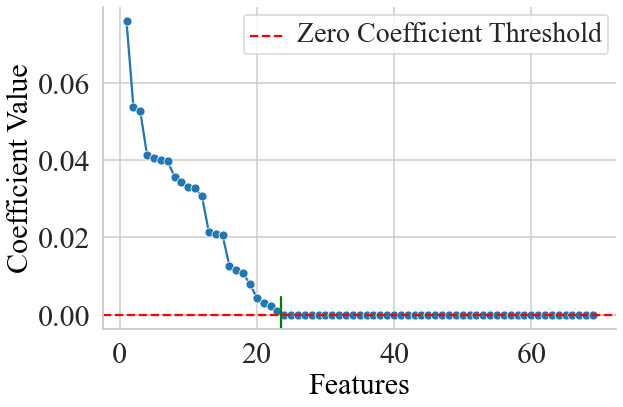

In [30]:
mpl.rcParams['font.sans-serif'] = font['family']

sns.set_context("talk")
sns.set_style("whitegrid")

plt.figure(figsize=(9, 6))
sorted_coefs = np.sort(np.abs(coefs))[::-1]
nonzero = np.count_nonzero(sorted_coefs)
plot = sns.lineplot([each+1 for each in range(len(sorted_coefs))], sorted_coefs, marker='o')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Coefficient Threshold')
plt.axvline(x=nonzero+0.5, ymin=0, ymax=0.1, color='g', linestyle='-')
# plt.title('LASSO Coefficients', fontdict=font, fontsize=20)
plt.xlabel('Features', fontdict=font)  #  (sorted by absolute magnitude)
plt.ylabel('Coefficient Value', fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=font['size'])

legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(28)
    text.set_fontname(font['family'])
    
sns.despine()

for text in [plot.xaxis.label, plot.yaxis.label]:
    text.set_fontsize(30)
    text.set_fontname(font['family'])

for item in plot.get_xticklabels() + plot.get_yticklabels():
    item.set_fontsize(30)
    item.set_fontname(font['family'])

plt.tight_layout()
plt.savefig('E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim2/lasso_coefficients.tif', dpi=300, format='tiff')

plt.show()

In [31]:
# Selection process for plotting alpha
# lasso_cv.alphas_ contains all tested alpha values
# lasso_cv.mse_path_ contains the error of the test at each alpha
mean_mse = np.mean(lasso_cv.mse_path_, axis=1)
std_mse = np.std(lasso_cv.mse_path_, axis=1)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


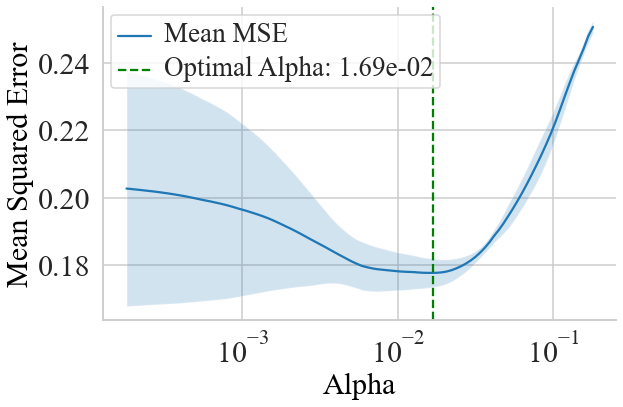

In [33]:
# Draw the alpha selection process and label the location of the best alpha value
# Set the global font to the font inside the font
mpl.rcParams['font.sans-serif'] = font['family']

sns.set_context("talk")
sns.set_style("whitegrid")

plt.figure(figsize=(9, 6))
sns.lineplot(lasso_cv.alphas_, mean_mse, label='Mean MSE')
plt.fill_between(lasso_cv.alphas_, mean_mse - std_mse, mean_mse + std_mse, alpha=0.2) # , label='MSE Standard Deviation'
plt.axvline(x=alpha, color='g', linestyle='--', label=f'Optimal Alpha: {alpha:.2e}')  
plt.xscale('log')
plt.xlabel('Alpha', fontdict=font)
plt.ylabel('Mean Squared Error', fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=font['size'])
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(27)
    text.set_fontname(font['family'])
    
sns.despine()

ax = plt.gca()
for text in [ax.xaxis.label, ax.yaxis.label]:
    text.set_fontsize(30)
    text.set_fontname(font['family'])

for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(30)
    item.set_fontname(font['family'])

plt.tight_layout()
plt.savefig('E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim2/lasso_cv_results.tif', dpi=300, format='tiff')

plt.show()

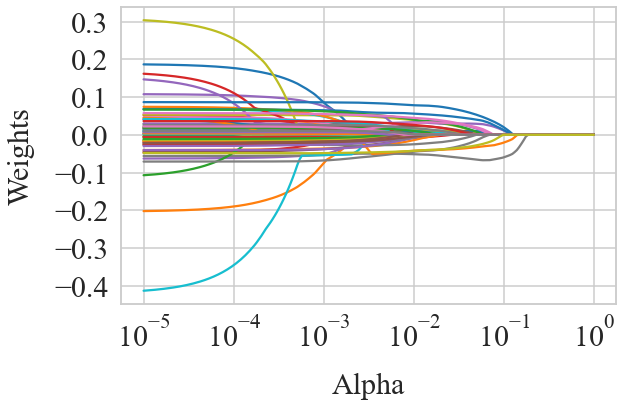

In [34]:
n_alphas = 200
alphas = np.logspace(-5, 0, n_alphas)

lasso1 = Lasso(random_state=42, max_iter=50000)

coefs1 = []

for a in alphas:
    lasso1.set_params(alpha=a)
    lasso1.fit(X, y)
    coefs1.append(lasso1.coef_)

plt.figure(figsize=(9, 6))
ax = plt.gca()

ax.plot(alphas, coefs1)
ax.set_xscale('log')


plt.xlabel('Alpha', fontname="Arial", labelpad=20)
plt.ylabel('Weights', fontname="Arial", labelpad=20)
# plt.title('Lasso coefficients as a function of the regularization', fontname="Arial", pad=20)
for text in [ax.xaxis.label, ax.yaxis.label]:
    text.set_fontsize(30)
    text.set_fontname(font['family'])

for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(30)
    item.set_fontname(font['family'])


plt.axis('tight')
plt.tight_layout()

plt.savefig('E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim2/lasso_coefficients_distribution.tif', dpi=300, format='tiff')

plt.show()

# Clustering with filtered features

In [169]:
X = X.iloc[:,selected_features_indices]
X

,Chemistry~Blood~Albumin~50862~g/dL,Chemistry~Blood~Alkaline Phosphatase~50863~IU/L,"Chemistry~Blood~Calcium, Total~50893~mg/dL",Chemistry~Blood~Chloride~50902~mEq/L,Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L,Chemistry~Blood~Phosphate~50970~mg/dL,Chemistry~Blood~Urea Nitrogen~51006~mg/dL,Hematology~Blood~Eosinophils~51200~%,Hematology~Blood~INR(PT)~51237~,Hematology~Blood~MCV~51250~fL,Hematology~Blood~Platelet Count~51265~K/uL,Hematology~Blood~PT~51274~sec,Hematology~Blood~RDW~51277~%,Hematology~Blood~Red Blood Cells~51279~m/uL,Hematology~Blood~White Blood Cells~51301~K/uL,"Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L","Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL",Hematology~Cerebrospinal Fluid~Eosinophils~52256~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL",age,resprate,acuity
636,-0.763063,1.267525,-0.391868,0.833249,2.934610,1.795181,4.776702,-0.732110,-0.134144,-0.624021,-0.762671,-0.167390,0.749054,0.105057,0.811213,-0.349053,-0.316907,0.363784,-0.404490,-0.230452,0.605391,7.389312,-1.921353
706,-0.716462,1.175646,0.561628,-0.632521,2.733157,-0.235004,5.774685,-0.270253,-1.460983,2.011155,-0.762671,-1.489972,0.110681,-0.929463,0.055861,0.024722,-0.229931,0.165016,0.822999,-0.207589,1.282383,-0.613224,0.740158
728,0.859194,-0.346718,-0.511055,0.540095,-0.178585,-0.696410,-0.475842,-0.576820,-0.576423,0.762914,0.189104,-0.722022,-0.705017,-0.192368,0.381082,0.774508,0.295546,-0.042975,1.436744,2.108621,1.097749,-0.727266,-0.505750
775,-0.217677,-0.615997,-0.391868,-0.632521,-0.373388,-0.788691,-0.843520,-0.381839,2.961813,1.872462,-0.845762,2.819085,-0.031179,-1.343271,-0.647035,0.224991,0.636201,-0.529590,0.467673,-0.227685,-0.379324,2.005045,-0.389411
20,2.046538,0.130521,0.800002,0.100364,-0.127906,-0.050442,-0.738469,-0.730103,0.308136,-1.872262,0.642329,0.557896,-0.563156,1.824946,-0.269359,0.194165,-0.153828,-0.385239,1.275232,-0.115550,-2.041031,-0.618292,0.710485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,-0.721168,-0.811240,-1.464551,0.393518,-0.254192,-0.604129,0.101938,-0.781198,-0.134144,1.733768,-1.321649,-0.338046,2.096729,-0.981189,-0.772927,-0.324105,-0.208188,-0.529590,-0.662909,-0.230429,-0.379324,0.155938,-0.824612
601,-2.616025,2.416014,1.276750,1.419557,11.998483,0.687807,0.574667,-0.781198,2.077254,-0.485327,-0.702241,2.008470,0.039751,-0.696696,-0.783418,-0.390593,-0.217994,0.284198,0.101488,-0.192600,0.051489,-0.444389,0.430303
243,0.063135,1.380507,0.680815,-0.632521,-0.091265,-0.050442,-0.423317,-0.012471,-0.617806,-1.040101,2.538324,-0.433943,-0.634087,1.889604,0.297154,1.874833,0.313666,-0.529590,0.306162,-0.087411,-0.871682,-0.012467,-0.407544
321,0.837726,-0.765301,0.442441,-0.485944,-0.156147,-1.342378,-0.896046,-0.576820,-0.576423,-0.069247,-0.558719,-0.679358,0.110681,0.428344,-0.542125,-0.354438,-0.262547,-0.188509,1.985884,-0.229280,-1.733308,1.027232,-0.021071


In [170]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 636 to 80
Data columns (total 23 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Chemistry~Blood~Albumin~50862~g/dL                                   814 non-null    float64
 1   Chemistry~Blood~Alkaline Phosphatase~50863~IU/L                      814 non-null    float64
 2   Chemistry~Blood~Calcium, Total~50893~mg/dL                           814 non-null    float64
 3   Chemistry~Blood~Chloride~50902~mEq/L                                 814 non-null    float64
 4   Chemistry~Blood~Lactate Dehydrogenase (LD)~50954~IU/L                814 non-null    float64
 5   Chemistry~Blood~Phosphate~50970~mg/dL                                814 non-null    float64
 6   Chemistry~Blood~Urea Nitrogen~51006~mg/dL                            814 non-null    float64
 7   Hematol

## 1、UMAP

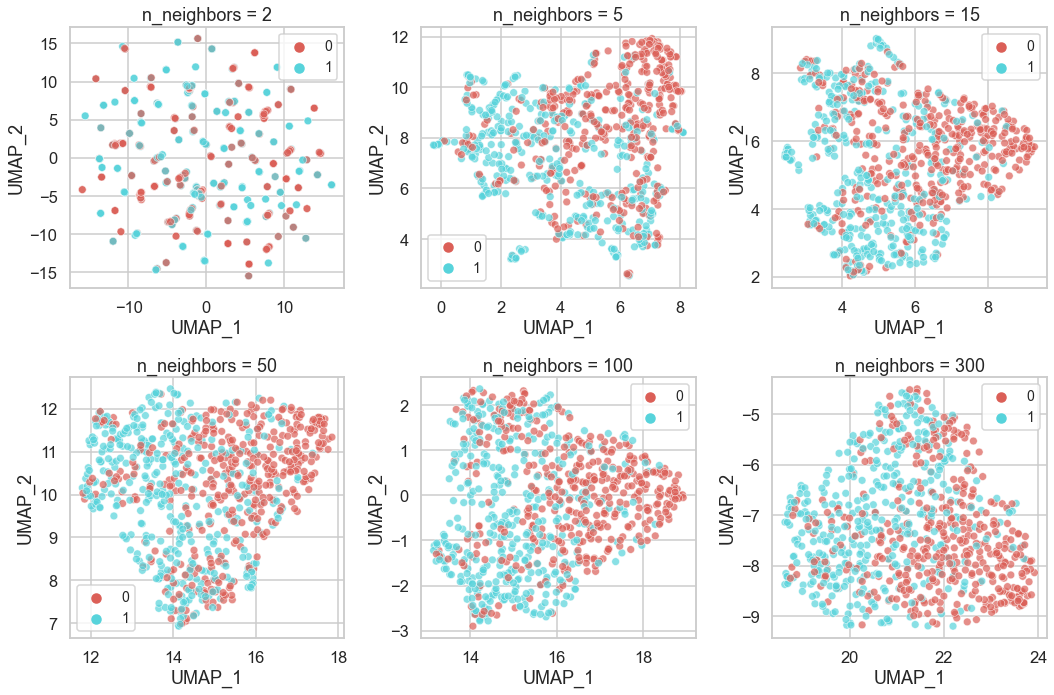

In [171]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

n_neighbors_list = [2, 5, 15, 50, 100, 300]

title_fontsize = 18
axis_label_fontsize = 14
legend_fontsize = 14
scatter_point_size = 60

for i, n_neighbors in enumerate(n_neighbors_list):

    reducer = umap.UMAP(n_neighbors=n_neighbors,
                        min_dist=0.1,
                        n_components=2,
                        random_state=42)
    embedding = reducer.fit_transform(X)

    embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])
    embedding_df['culture'] = y.values

    ax = axs[i // 3, i % 3]

    n_classes = len(embedding_df['culture'].unique())

    scatter = sns.scatterplot(
        x="UMAP_1", 
        y="UMAP_2",
        hue="culture",
        palette=sns.color_palette("hls", n_classes),
        data=embedding_df,
        legend="full",
        alpha=0.7, 
        ax=ax,
        s=scatter_point_size
    )
    ax.set_title(f'n_neighbors = {n_neighbors}')
#     ax.legend(title="Classes", fontsize=legend_fontsize, title_fontsize=legend_fontsize)
    ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    ax.grid(True)

plt.tight_layout()
plt.show()

## 2、t-SNE

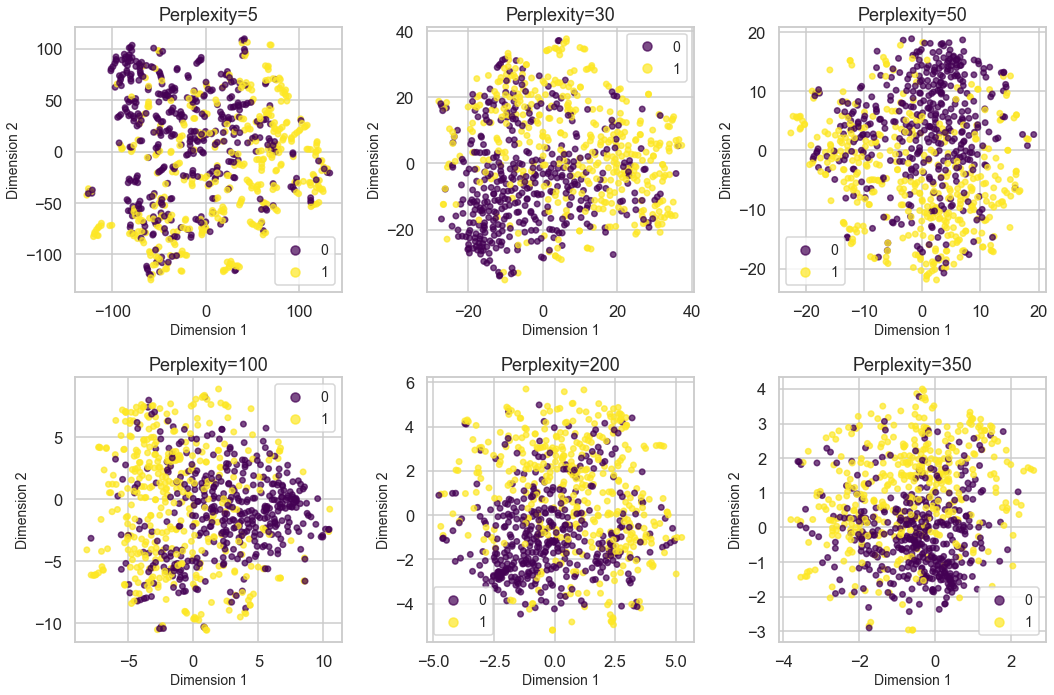

In [172]:
X_scaled = X.copy()

scatter_point_size = 30 
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

perplexities = [5, 30, 50, 100, 200, 350]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

title_fontsize = 18
axis_label_fontsize = 14
legend_fontsize = 14

for i, perplexity in enumerate(perplexities):

    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=10000, random_state=42, init='random', learning_rate=200.0)  # 
    X_tsne = tsne.fit_transform(X_pca)

    df_tsne = pd.DataFrame(data=X_tsne, columns=["Dim1", "Dim2"])
    df_tsne['label'] = y.values

    ax = axs[i // 3, i % 3]

    scatter = ax.scatter(df_tsne['Dim1'], df_tsne['Dim2'], c=df_tsne['label'], cmap='viridis', alpha=0.7, s=scatter_point_size)
    ax.set_title(f'Perplexity={perplexity}', fontsize=title_fontsize)

    ax.set_xlabel('Dimension 1', fontsize=axis_label_fontsize)
    ax.set_ylabel('Dimension 2', fontsize=axis_label_fontsize)

    handles, labels = scatter.legend_elements()
    ax.legend(handles, labels,  fontsize=legend_fontsize, title_fontsize=legend_fontsize)
    ax.grid(True)

plt.tight_layout()

plt.show()